In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_frame = pd.read_excel("data.xlsx")

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [6]:
data_frame

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [7]:
df = data_frame.drop(axis=0, index=0)
df.drop(df.columns[5], axis=1, inplace=True)

In [8]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


### Вопросы:

#### 1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [9]:
df_july = df.dropna()
df_july = df_july.loc[
    df_july['status'] != "ВНУТРЕННИЙ"
]

In [10]:
df_july

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-09 00:00:00
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


In [11]:
df_july['receiving_date'] = pd.to_datetime(df_july['receiving_date'], format="%Y-%m-%d %H:%M:%S")

In [12]:
df_july.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 2 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       595 non-null    float64       
 1   sum             595 non-null    float64       
 2   status          595 non-null    object        
 3   sale            595 non-null    object        
 4   new/current     595 non-null    object        
 5   document        595 non-null    object        
 6   receiving_date  595 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 53.4+ KB


In [13]:
df_july = df_july.loc[
    (df_july['status'] != 'ПРОСРОЧЕНО')
    &
    (df_july['receiving_date'].dt.month == 7)
]

In [14]:
df_july

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
12,32.0,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
13,34.0,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09
...,...,...,...,...,...,...,...
251,273.0,10133.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06
252,277.0,4798.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08
253,281.0,5733.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22
254,282.0,953.70,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16


In [15]:
df_july['sum'].sum()

735895.9399999998

Ответ: 735895.9

2. Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [16]:
df_income = df_july.drop(axis=1, labels=['client_id', 'status', 'sale', 'new/current', 'document'])

In [17]:
df_income = df_income.sort_values(by='receiving_date')

In [18]:
df_income = df_income.groupby(by='receiving_date')['sum'].sum().reset_index()

In [19]:
df_income

,receiving_date,sum
0,2021-07-01,14729.20
1,2021-07-02,24448.15
2,2021-07-05,7270.90
3,2021-07-06,102776.12
4,2021-07-07,56170.30
5,2021-07-08,32527.70
6,2021-07-09,29503.05
7,2021-07-12,36484.80
8,2021-07-13,66333.70
9,2021-07-14,13579.80


In [20]:
poly_coeff = np.polyfit(df_income.index, df_income['sum'], 1)
trend = np.polyval(poly_coeff, df_income.index)

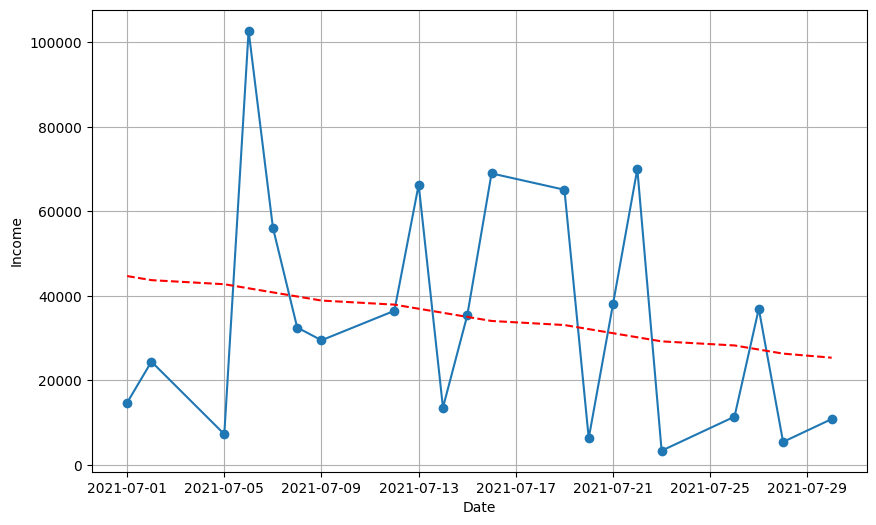

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_income['receiving_date'], df_income['sum'], marker='o')
plt.plot(df_income['receiving_date'], trend, color='r', linestyle='--', label='Trend line')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid(True)
plt.show()

Ответ: Выручка уменьшалась.

#### 3. Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [22]:
df_september = df.dropna()
df_september = df_september.loc[
    df_september['status'] != "ВНУТРЕННИЙ"
]

In [23]:
df_september['receiving_date'] = pd.to_datetime(df_september['receiving_date'], format="%Y-%m-%d %H:%M:%S")

In [24]:
df_september = df_september.loc[
    df_september['receiving_date'].dt.month == 9
]

In [25]:
df_september

,client_id,sum,status,sale,new/current,document,receiving_date
21,46.0,4945.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
22,47.0,4449.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
23,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
29,59.0,3938.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-09-23
133,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-09-09
...,...,...,...,...,...,...,...
479,303.0,22413.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-09-10
480,304.0,1783.7,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-09-10
481,285.0,3423.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-09-02
482,286.0,3678.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-09-21


In [26]:
df_september = df_september.groupby(by='sale')['sum'].sum().reset_index()

In [27]:
df_september

,sale,sum
0,Андреев,124714.55
1,Васильев,55667.50
2,Иванов,165314.80
3,Кузнецова,60230.20
4,Петрова,219240.12
5,Смирнов,146791.70
6,Соколов,44234.60
7,Филимонова,45763.30


In [28]:
df_september.sort_values(by='sum', ascending=False).head(1)['sale']

4    Петрова
Name: sale, dtype: object

Ответ: Петрова

#### 4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [29]:
df_october = df.dropna()
df_october = df_october.loc[
    df_october['status'] != "ВНУТРЕННИЙ"
]
df_october['receiving_date'] = pd.to_datetime(df_october['receiving_date'], format="%Y-%m-%d %H:%M:%S")

In [30]:
df_october = df_october.loc[
    df_october['receiving_date'].dt.month == 10
]

In [31]:
df_october

,client_id,sum,status,sale,new/current,document,receiving_date
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13
24,48.0,4452.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-10-08
139,31.0,6523.7,ОПЛАЧЕНО,Филимонова,новая,оригинал,2021-10-12
322,175.0,5328.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-04
338,228.0,6393.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-10-06
...,...,...,...,...,...,...,...
589,304.0,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13
590,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05
591,285.0,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05
592,286.0,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20


In [32]:
df_october['new/current'].max()

'текущая'

In [33]:
df_october.loc[
    df['new/current'] == 'текущая'
].count(axis=0)['new/current']

101

In [34]:
df_october.loc[
    df['new/current'] == 'новая'
].count(axis=0)['new/current']

16

Ответ: текущая

#### 5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [35]:
df_may = df.dropna()
df_may = df_may.loc[
    df_may['status'] != "ВНУТРЕННИЙ"
]
df_may['receiving_date'] = pd.to_datetime(df_may['receiving_date'], format="%Y-%m-%d %H:%M:%S")
df_may = df_may.loc[
    df_may['receiving_date'].dt.month == 5
]

In [36]:
df_may

,client_id,sum,status,sale,new/current,document,receiving_date
50,94.0,31094.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
51,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31
178,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18


In [37]:
df_may.loc[
    df_may['document'] == 'оригинал'
].count(axis=0)['document']

4

Ответ: 4

### Задание

1. За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).


In [38]:
df['sale'].drop_duplicates().dropna().count() - 1

11

11 менеджеров

In [39]:
df_bonus = df.dropna()
df_bonus = df_bonus.loc[
    df_bonus['status'] != "ВНУТРЕННИЙ"
]
df_bonus['receiving_date'] = pd.to_datetime(df_bonus['receiving_date'], format="%Y-%m-%d %H:%M:%S")

Посчитаем бонус который каждый менеджер будет иметь в месяц.

In [40]:
df_bonus.sort_values(by='receiving_date')

,client_id,sum,status,sale,new/current,document,receiving_date
51,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
50,94.0,31094.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
178,95.0,4688.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-05-18
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31
122,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-06-01
...,...,...,...,...,...,...,...
685,211.0,1953.7,В РАБОТЕ,Андреев,текущая,оригинал,2021-11-12
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
607,289.0,9981.7,ПРОСРОЧЕНО,Кузнецова,текущая,оригинал,2021-11-15


In [68]:
import calendar

In [88]:
dates = [calendar.month_abbr[i] for i in range(5, 12)]
names = df_bonus.sort_values(by='sale')['sale'].drop_duplicates().to_list()

In [89]:
dates

['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

In [132]:
manager_bonus = pd.DataFrame(data=0.0, index=dates, columns=names)

In [133]:
manager_bonus

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
month_dict = {
    k: v for k, v in zip(dates, range(5, 12))
}

In [135]:
month_dict

{'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11}

In [136]:
def get_temp_dict(month_number: int):
   return df_bonus.loc[
    (df_bonus['status'] == 'ОПЛАЧЕНО')
    &
    (df_bonus['document'] == 'оригинал')
    &
    (df_bonus['receiving_date'].dt.month == month_number)
  ].groupby(by='sale')['sum'].sum().to_dict()

In [137]:
for month_name, month_number in month_dict.items():
  temp_dict = get_temp_dict(month_number)
  for name, income in temp_dict.items():
    manager_bonus.at[month_name, name] = income * 0.07

Таблица бонуса для каждого менеджера за каждый месяц.

In [138]:
manager_bonus

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,2833.0120,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,241.7590
Jun,4219.6833,744.5270,4021.073,5512.0576,0.000,11879.1260,824.418,6353.508,0.000,714.1680
Jul,6590.4993,1119.6640,7506.198,7604.1784,0.000,10205.5996,6578.726,9685.781,0.000,2222.0695
Aug,7395.8199,2942.2540,6516.328,8210.6101,0.000,13704.5216,2953.685,9681.063,1534.127,7436.8546
Sep,8730.0185,3896.7250,11572.036,4216.1140,0.000,14727.0494,0.000,9251.501,3096.422,2585.7720
Oct,10735.7950,1845.6725,6550.579,6139.0280,298.809,6362.8642,0.000,13879.810,1676.927,4076.7804
Nov,4046.0840,818.7270,3332.658,2278.6190,308.259,2160.6340,0.000,1155.616,933.618,516.7680


In [139]:
manager_bonus.loc['Sum'] = manager_bonus.cumsum().iloc[-1]

Таблица с суммарным бонусом за период.

In [140]:
manager_bonus

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,2833.0120,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,241.7590
Jun,4219.6833,744.5270,4021.073,5512.0576,0.000,11879.1260,824.418,6353.508,0.000,714.1680
Jul,6590.4993,1119.6640,7506.198,7604.1784,0.000,10205.5996,6578.726,9685.781,0.000,2222.0695
Aug,7395.8199,2942.2540,6516.328,8210.6101,0.000,13704.5216,2953.685,9681.063,1534.127,7436.8546
Sep,8730.0185,3896.7250,11572.036,4216.1140,0.000,14727.0494,0.000,9251.501,3096.422,2585.7720
Oct,10735.7950,1845.6725,6550.579,6139.0280,298.809,6362.8642,0.000,13879.810,1676.927,4076.7804
Nov,4046.0840,818.7270,3332.658,2278.6190,308.259,2160.6340,0.000,1155.616,933.618,516.7680
Sum,44550.9120,11367.5695,39498.872,33960.6071,607.068,59039.7948,10356.829,50007.279,7241.094,17794.1715


2. За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [155]:
df_salary = df.dropna()
df_salary = df_salary.loc[
    df_salary['status'] != "ВНУТРЕННИЙ"
]
df_salary['receiving_date'] = pd.to_datetime(df_salary['receiving_date'], format="%Y-%m-%d %H:%M:%S")
df_salary

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15
...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-11-09
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08


In [157]:
manager_salary = pd.DataFrame(data=0.0, index=dates, columns=names)
manager_salary

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
def get_salary_temp(month_number: int):
    return df_salary.loc[
      (df_salary['status'] != 'ПРОСРОЧЕНО')
      &
      (df_salary['document'] == 'оригинал')
      &
      (df_salary['receiving_date'].dt.month == month_number)
      ].groupby(by='sale')['sum'].sum().to_dict()

In [188]:
for month_name, month_number in month_dict.items():
  temp_dict = get_salary_temp(month_number)
  for name, income in temp_dict.items():
    manager_salary.at[month_name, name] = income * 0.05 if income > 10_000 else 0.03

In [189]:
manager_salary

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,2023.5800,0.0000,0.000,0.0000,0.00,0.000,0.000,0.000,0.000,0.0300
Jun,3014.0595,531.8050,2872.195,3937.1840,0.00,8485.090,588.870,4538.220,0.000,510.1200
Jul,4707.4995,799.7600,5361.570,5431.5560,0.00,7289.714,4699.090,6918.415,0.000,1587.1925
Aug,5282.7285,2101.6100,4654.520,5864.7215,0.00,9788.944,2109.775,6915.045,1095.805,5312.0390
Sep,6235.7275,2783.3750,8265.740,3011.5100,0.00,10519.321,0.000,7339.585,2211.730,1846.9800
Oct,7668.4250,1318.3375,4693.670,4385.0200,0.03,5616.938,0.000,10727.520,1197.805,2911.9860
Nov,3710.4300,584.8050,3477.825,1627.5850,0.03,2252.180,0.000,1901.070,1095.805,0.0300


In [178]:
df_remainder = df

In [179]:
df_remainder['document'] = 'НЕТ'

In [182]:
df_remainder = df_remainder.dropna()
df_remainder = df_remainder.loc[
    df_remainder['status'] != "ВНУТРЕННИЙ"
]
df_remainder['receiving_date'] = pd.to_datetime(df_remainder['receiving_date'], format="%Y-%m-%d %H:%M:%S")

In [183]:
df_remainder

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,НЕТ,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,НЕТ,2021-07-15
...,...,...,...,...,...,...,...
718,304.0,2803.7,ОПЛАЧЕНО,Андреев,текущая,НЕТ,2021-11-09
724,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,НЕТ,2021-11-15
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,НЕТ,2021-11-15
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,НЕТ,2021-11-08


In [164]:
manager_remainder = pd.DataFrame(data=0.0, index=dates, columns=names)
manager_remainder

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
def get_remainder_temp(month_number: int):
    return df_remainder.loc[
      (df_remainder['status'] == 'ОПЛАЧЕНО')
      &
      (df_remainder['receiving_date'].dt.month == month_number)
      ].groupby(by='sale')['sum'].sum().to_dict()

In [191]:
for month_name, month_number in month_dict.items():
  temp_dict = get_remainder_temp(month_number)
  for name, income in temp_dict.items():
    manager_remainder.at[month_name, name] = income * 0.07

Таблица остатков на конец каждого месяца.

In [192]:
manager_remainder

,Андреев,Васильев,Иванов,Кузнецова,Михайлов,Петрова,Селиванов,Смирнов,Соколов,Филимонова
May,2833.0120,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000,241.7590
Jun,4219.6833,744.5270,4021.073,5512.0576,0.000,11879.1260,824.418,7049.917,0.000,714.1680
Jul,6611.4083,1119.6640,7506.198,7604.1784,0.000,10205.5996,6578.726,11200.308,0.000,2222.0695
Aug,7395.8199,2942.2540,6516.328,8210.6101,0.000,13704.5216,2953.685,9681.063,1534.127,7436.8546
Sep,8730.0185,3896.7250,11572.036,4216.1140,0.000,14727.0494,0.000,9843.295,3096.422,2585.7720
Oct,12380.5430,1845.6725,6550.579,6139.0280,298.809,6891.6232,0.000,14033.369,1676.927,4573.8994
Nov,4046.0840,818.7270,3332.658,2278.6190,308.259,2160.6340,0.000,1155.616,933.618,516.7680
